In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('wheat_coffee_corn_prizes.csv')

In [3]:
df.head()

Date  Wheat   Coffe   Corn
0  8/20/1973  5.085  0.6735  3.115
1  8/21/1973  5.285  0.6710  3.015
2  8/22/1973  5.085  0.6580  2.915
3  8/23/1973  5.005  0.6675  2.815
4  8/24/1973  5.180  0.6660  2.900

In [4]:
df.drop(columns=['Wheat', 'Corn'], axis=1, inplace=True)

In [5]:
df.shape

(12539, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12539 entries, 0 to 12538
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12539 non-null  object 
 1   Coffe   12539 non-null  float64
dtypes: float64(1), object(1)
memory usage: 196.1+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Date'].min(), df['Date'].max()

(Timestamp('1973-08-20 00:00:00'), Timestamp('2023-09-05 00:00:00'))

In [11]:
df['Ano'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month

In [12]:
df.isna().sum()

Date     0
Coffe    0
Ano      0
Mes      0
dtype: int64

In [15]:
def variacao_coluna(linha):
    if linha.name == 0:
        return 0

    else:
        return linha[1] - df.iloc[(linha.name - 1), 1]

In [16]:
df.apply(variacao_coluna, axis=1)

C:\Users\romul\AppData\Local\Temp\ipykernel_7712\2774698472.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return linha[1] - df.iloc[(linha.name - 1), 1]


0        0.0000
1       -0.0025
2       -0.0130
3        0.0095
4       -0.0015
          ...  
12534    0.0204
12535   -0.0081
12536   -0.0271
12537    0.0000
12538    0.0188
Length: 12539, dtype: float64

In [17]:
df['Variacao Cafe'] = df.apply(variacao_coluna, axis=1)

C:\Users\romul\AppData\Local\Temp\ipykernel_7712\2774698472.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return linha[1] - df.iloc[(linha.name - 1), 1]


In [18]:
df.head()

Date   Coffe   Ano  Mes  Variacao Cafe
0 1973-08-20  0.6735  1973    8         0.0000
1 1973-08-21  0.6710  1973    8        -0.0025
2 1973-08-22  0.6580  1973    8        -0.0130
3 1973-08-23  0.6675  1973    8         0.0095
4 1973-08-24  0.6660  1973    8        -0.0015

In [19]:
df['Variacao Cafe'].std()

0.03165372968943535

In [20]:
df['Variacao Cafe'].median()

0.0

In [21]:
print('%f' % df['Variacao Cafe'].mean())

0.000069


In [22]:
print(df['Variacao Cafe'].min(), df['Variacao Cafe'].max())

-0.38400000000000034 0.47


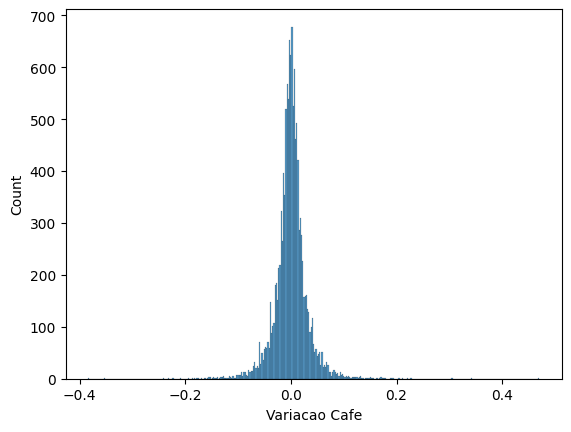

In [23]:
import seaborn as sns
sns.histplot(data=df, x='Variacao Cafe');

In [24]:
data = df['Date'].dt.year

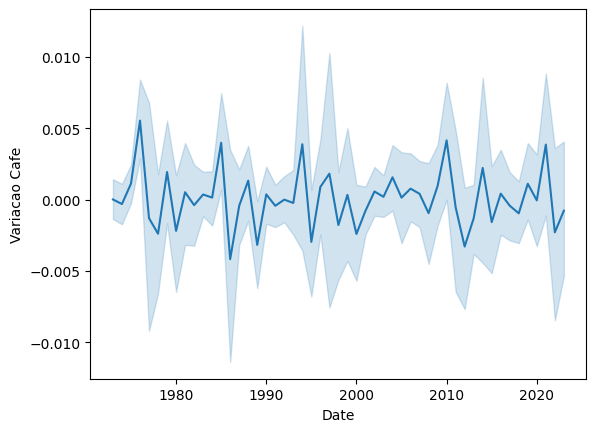

In [25]:
sns.lineplot(data=df, x=data, y='Variacao Cafe');

In [26]:
def criar_estados(linha):
    variacao = linha[4]
    if variacao < (0.000069 - 0.015):
        return 0

    elif (0.000069 - 0.015) <= variacao <= (0.000069 + 0.015):
        return 1
    
    else:
        return 2

In [27]:
df['Estados Variacao'] = df.apply(criar_estados, axis=1)

C:\Users\romul\AppData\Local\Temp\ipykernel_7712\4160568833.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  variacao = linha[4]


In [28]:
df.head()

Date   Coffe   Ano  Mes  Variacao Cafe  Estados Variacao
0 1973-08-20  0.6735  1973    8         0.0000                 1
1 1973-08-21  0.6710  1973    8        -0.0025                 1
2 1973-08-22  0.6580  1973    8        -0.0130                 1
3 1973-08-23  0.6675  1973    8         0.0095                 1
4 1973-08-24  0.6660  1973    8        -0.0015                 1

Desvio Padrão

In [29]:
df['Estados Variacao'].value_counts()

Estados Variacao
1    6819
0    2895
2    2825
Name: count, dtype: int64

Desvio padrão / 2

Escolhido

In [30]:
df['Estados Variacao'].value_counts()

Estados Variacao
1    6819
0    2895
2    2825
Name: count, dtype: int64

In [31]:
df['Estados Variacao'].value_counts(normalize=True)

Estados Variacao
1    0.543823
0    0.230880
2    0.225297
Name: proportion, dtype: float64

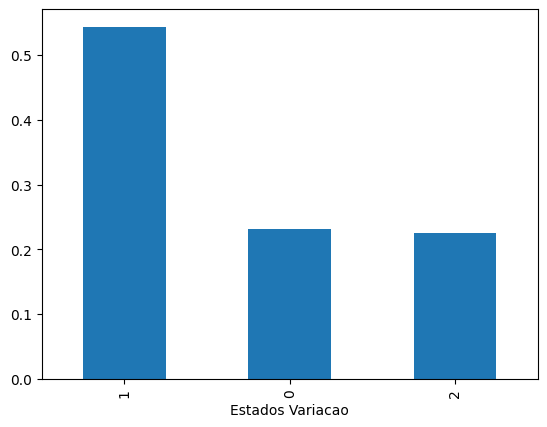

In [32]:
df['Estados Variacao'].value_counts(normalize=True).plot(kind='bar');

### Criando a matriz de transições

In [33]:
transitions = df['Estados Variacao'].to_list()
transitions

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 2,


In [34]:
df2 = pd.DataFrame(transitions)
df2

0
0      1
1      1
2      1
3      1
4      1
...   ..
12534  2
12535  1
12536  0
12537  1
12538  2

[12539 rows x 1 columns]

In [37]:
df2['shift'] = df2[0].shift(-1)
df2

0  shift
0      1    1.0
1      1    1.0
2      1    1.0
3      1    1.0
4      1    1.0
...   ..    ...
12534  2    1.0
12535  1    0.0
12536  0    1.0
12537  1    2.0
12538  2    NaN

[12539 rows x 2 columns]

In [40]:
trans_mat = df2.groupby([0, 'shift']).value_counts().unstack().fillna(0)
trans_mat

shift   0.0   1.0   2.0
0                      
0       804  1340   751
1      1317  4233  1269
2       774  1245   805

In [41]:
trans_mat = trans_mat.div(trans_mat.sum(axis=1), axis=0).values
trans_mat

array([[0.27772021, 0.46286701, 0.25941278],
       [0.19313682, 0.62076551, 0.18609767],
       [0.27407932, 0.44086402, 0.28505666]])

Fazer previsões por mês

In [45]:
np.matmul((0, 1, 0), trans_mat)

array([0.23939258, 0.52620668, 0.23440074])

In [52]:
df

Date   Coffe   Ano  Mes  Variacao Cafe  Estados Variacao
0     1973-08-20  0.6735  1973    8         0.0000                 1
1     1973-08-21  0.6710  1973    8        -0.0025                 1
2     1973-08-22  0.6580  1973    8        -0.0130                 1
3     1973-08-23  0.6675  1973    8         0.0095                 1
4     1973-08-24  0.6660  1973    8        -0.0015                 1
...          ...     ...   ...  ...            ...               ...
12534 2023-08-30  1.5512  2023    8         0.0204                 2
12535 2023-08-31  1.5431  2023    8        -0.0081                 1
12536 2023-09-01  1.5160  2023    9        -0.0271                 0
12537 2023-09-04  1.5160  2023    9         0.0000                 1
12538 2023-09-05  1.5348  2023    9         0.0188                 2

[12539 rows x 6 columns]

In [49]:
df3 = df.groupby(['Ano', 'Mes'])['Estados Variacao'].value_counts().unstack().fillna(0)
df3

Estados Variacao     0     1    2
Ano  Mes                         
1973 8             1.0   9.0  0.0
     9             0.0  17.0  2.0
     10            1.0  20.0  0.0
     11            1.0  18.0  1.0
     12            0.0  19.0  0.0
...                ...   ...  ...
2023 5             7.0  12.0  4.0
     6            11.0   5.0  6.0
     7             5.0  10.0  6.0
     8             7.0  11.0  5.0
     9             1.0   1.0  1.0

[602 rows x 3 columns]

In [60]:
mat_estados = df3.div(df3.sum(axis=1), axis=0)

In [61]:
mat_estados

Estados Variacao         0         1         2
Ano  Mes                                      
1973 8            0.100000  0.900000  0.000000
     9            0.000000  0.894737  0.105263
     10           0.047619  0.952381  0.000000
     11           0.050000  0.900000  0.050000
     12           0.000000  1.000000  0.000000
...                    ...       ...       ...
2023 5            0.304348  0.521739  0.173913
     6            0.500000  0.227273  0.272727
     7            0.238095  0.476190  0.285714
     8            0.304348  0.478261  0.217391
     9            0.333333  0.333333  0.333333

[602 rows x 3 columns]

In [62]:
mat_estados_valores = mat_estados.values

In [65]:
mat_estados_valores

array([[0.1       , 0.9       , 0.        ],
       [0.        , 0.89473684, 0.10526316],
       [0.04761905, 0.95238095, 0.        ],
       ...,
       [0.23809524, 0.47619048, 0.28571429],
       [0.30434783, 0.47826087, 0.2173913 ],
       [0.33333333, 0.33333333, 0.33333333]])

In [67]:
mat_estados_valores[0]

array([0.1, 0.9, 0. ])

In [68]:
np.matmul(mat_estados_valores[0], trans_mat)

array([0.20159516, 0.60497566, 0.19342918])

In [69]:
mat_estados_valores[1]

array([0.        , 0.89473684, 0.10526316])

In [70]:
np.matmul(mat_estados_valores[1], trans_mat)

array([0.20165709, 0.60182851, 0.1965144 ])

In [71]:
mat_estados_valores[2]

array([0.04761905, 0.95238095, 0.        ])